### Prophet exercise

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [4]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [5]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* use only the `Date` and `Adj Close` columns

In [12]:
df = pd.concat([wmt['Date'], wmt['Adj Close']], axis=1)
df.head()

,Date,Adj Close
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* rename columns to fit the Prophet naming convention

In [13]:
columns = ['ds', 'y']
df.columns = columns
df.head()

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* convert date to datetime

In [16]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11815 entries, 0 to 11814
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      11815 non-null  datetime64[ns]
 1   y       11815 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 184.7 KB


* plot time-series

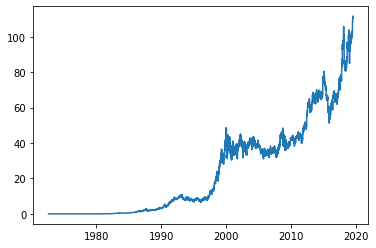

In [20]:
plt.plot(df.ds, df.y)
plt.show()

* instantiate Prophet

In [21]:
prophet = Prophet()

* fit model

In [22]:
prophet.fit(df)

11:23:05 - cmdstanpy - INFO - Chain [1] start processing
11:23:17 - cmdstanpy - INFO - Chain [1] done processing


* forecast 365 values into the future 

In [23]:
future = prophet.make_future_dataframe(periods=365)
future.tail()

,ds
12175,2020-06-27
12176,2020-06-28
12177,2020-06-29
12178,2020-06-30
12179,2020-07-01


* plot forecast

In [25]:
forecast = prophet.predict(future)

* plot components

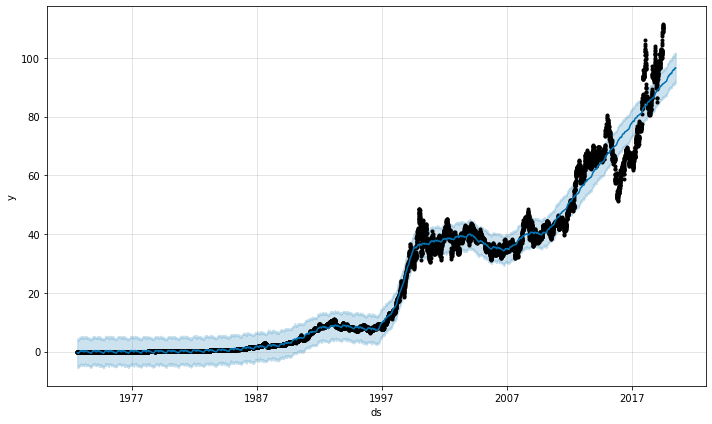

In [26]:
fig = prophet.plot(forecast)

## Stretch
### Arima vs. Prophet Modeling

- Build the separate ARIMA model and compare with existing Prophet prediction. Use the last 7 values we have in the timeseries to test which approach has better predictions.